# Albedo Regression Example

# Imports

In [10]:
import ROOT
from ROOT import TMVA,TFile, TTree, TCut, TString, TCanvas,  TASImage
import matplotlib.pyplot as plt
import numpy as np

# Plotting raw data

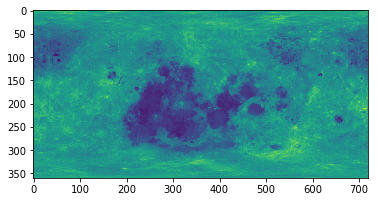

In [15]:
img=np.genfromtxt('Albedo_Map.csv',delimiter=',')
imgplot = plt.imshow(img)
plt.show()

## Declare Factory
Initiate the TMVA library, get the data sample from github, and create a factory to do the regression.

In [1]:
TMVA.Tools.Instance();

inputFile = TFile.Open("dataset.root");
outputFile = TFile.Open("TMVAOutputBDT.root", "RECREATE");

factory = TMVA.Factory("TMVARegression", outputFile,
                      "!V:!Silent:Color:DrawProgressBar:AnalysisType=Regression" ); 

Welcome to JupyROOT 6.09/01


## Declare DataLoader
Define the features and the target for the regression.

In [2]:
loader = TMVA.DataLoader("dataset"); 

#Add the feature variables, names reference branches in inputFile ttree
loader.AddVariable("Fast_Map_extra", "", "units", 'F' );
loader.AddVariable("LPFe_Map", "", "units", 'F' );
loader.AddVariable("LPK_Map_extra", "", "units", 'F' );
loader.AddVariable("LPTh_Map", "", "units", 'F' );
loader.AddVariable("LPTi_Map", "", "units", 'F' );
loader.AddVariable("Therm_Map", "", "units", 'F' );

loader.AddTarget( "Albedo_Map" ); # define the target for the regression


## Setup Dataset
Link dataloader to dataset.

In [3]:
tree=TTree()
inputFile.GetObject("TreeR", tree);

mycuts = TCut(""); # e.g. TCut mycuts = "abs(var1)<0.5";

loader.AddRegressionTree(tree, 1.0);   # link the TTree to the loader, weight for each event  = 1
loader.PrepareTrainingAndTestTree(mycuts,"nTrain_Regression=129600:nTest_Regression=129960:SplitMode=Random:NormMode=NumEvents:!V" );

DataSetInfo              : [dataset] : Added class "Regression"
                         : Add Tree TreeR of type Regression with 259560 events
                         : Dataset[dataset] : Class index : 0  name : Regression


# Book The Regression Method

Book the method for regression. Here we choose the Boosted Decision Tree model. You have to use gradient boosted trees for regression, hence the BDTG and BoostType=Grad. 

Define the hyperparameters: ntrees, boosttype, shrinkage, and the depth. Also define the loss function you want to use: 'AbsoluteDeviation', 'Huber', or 'LeastSquares'. nCuts determines how finely to look at each feature. Larger values take more time, but you may get more accurate results.

In [4]:
# Boosted Decision Trees 
factory.BookMethod(loader,TMVA.Types.kBDT, "BDTG","!H:!V:NTrees=200::BoostType=Grad:Shrinkage=0.3:nCuts=20:MaxDepth=4:RegressionLossFunctionBDTG=AbsoluteDeviation");

Factory                  : Booking method: BDTG
                         : 
                         : the option *InverseBoostNegWeights* does not exist for BoostType=Grad --> change
                         : to new default for GradBoost *Pray*
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : Number of training and testing events
                         : ---------------------------------------------------------------------------
                         : Regression -- training events            : 129600
                         : Regression -- testing events             : 129960
                         : Regression -- training and testing events: 259560
                         : 
DataSetInfo              : Correlation matrix (Regression):
                         : ---------------------------------------------------------------------------------
                         :                 Fast_Map_extra 

# Train Method

In [5]:
factory.TrainAllMethods();

Factory                  : Train all methods
Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'Fast_Map_extra' <---> Output : variable 'Fast_Map_extra'
                         : Input : variable 'LPFe_Map' <---> Output : variable 'LPFe_Map'
                         : Input : variable 'LPK_Map_extra' <---> Output : variable 'LPK_Map_extra'
                         : Input : variable 'LPTh_Map' <---> Output : variable 'LPTh_Map'
                         : Input : variable 'LPTi_Map' <---> Output : variable 'LPTi_Map'
                         : Input : variable 'Therm_Map' <---> Output : variable 'Therm_Map'
TFHandler_Factory        :       Variable              Mean              RMS      [        Min              Max ]
                         : --------------------------------------------------------------

0%, time left: unknown
7%, time left: 103 sec
13%, time left: 94 sec
19%, time left: 86 sec
25%, time left: 78 sec
32%, time left: 72 sec
38%, time left: 65 sec
44%, time left: 58 sec
50%, time left: 52 sec
57%, time left: 45 sec
63%, time left: 39 sec
69%, time left: 33 sec
75%, time left: 26 sec
82%, time left: 19 sec
88%, time left: 13 sec
94%, time left: 6 sec
0%, time left: unknown
6%, time left: 10 sec
12%, time left: 9 sec
18%, time left: 9 sec
25%, time left: 8 sec
31%, time left: 7 sec
37%, time left: 7 sec
43%, time left: 6 sec
50%, time left: 5 sec
56%, time left: 5 sec
62%, time left: 4 sec
68%, time left: 3 sec
75%, time left: 2 sec
81%, time left: 2 sec
87%, time left: 1 sec
93%, time left: 0 sec


# Test and Evaluate the Model

In [6]:
factory.TestAllMethods();
factory.EvaluateAllMethods();    

Factory                  : Test all methods
Factory                  : Test method: BDTG for Regression performance
                         : 
                         : Dataset[dataset] : Create results for testing
                         : Dataset[dataset] : Evaluation of BDTG on testing sample
                         : Dataset[dataset] : Elapsed time for evaluation of 129960 events: 7.33 sec       
                         : Create variable histograms
                         : Create regression target histograms
                         : Create regression average deviation
                         : Results created
Factory                  : Evaluate all methods
                         : Evaluate regression method: BDTG
TFHandler_BDTG           :       Variable              Mean              RMS      [        Min              Max ]
                         : -----------------------------------------------------------------------------------------
                         : Fas

0%, time left: unknown
6%, time left: 5 sec
12%, time left: 5 sec
18%, time left: 5 sec
25%, time left: 5 sec
31%, time left: 4 sec
37%, time left: 4 sec
43%, time left: 3 sec
50%, time left: 3 sec
56%, time left: 3 sec
62%, time left: 2 sec
68%, time left: 2 sec
75%, time left: 1 sec
81%, time left: 1 sec
87%, time left: 0 sec
93%, time left: 0 sec


## Gather and Plot the Results
Let's plot the residuals for the BDTG predictions. First, close the output file so that it saves to disk and we can open it without issue. Then get the results on the test set. Finally, plot the residuals.

In [18]:
%jsroot on
outputFile.Close();
resultsFile = TFile.Open("TMVAOutputBDT.root");
resultsTree = resultsFile.Get("dataset/TestTree"); 
c=TCanvas() ;
resultsTree.Draw("BDTG"); # BDTG is the predicted value, target is the true value
c.Draw()